'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


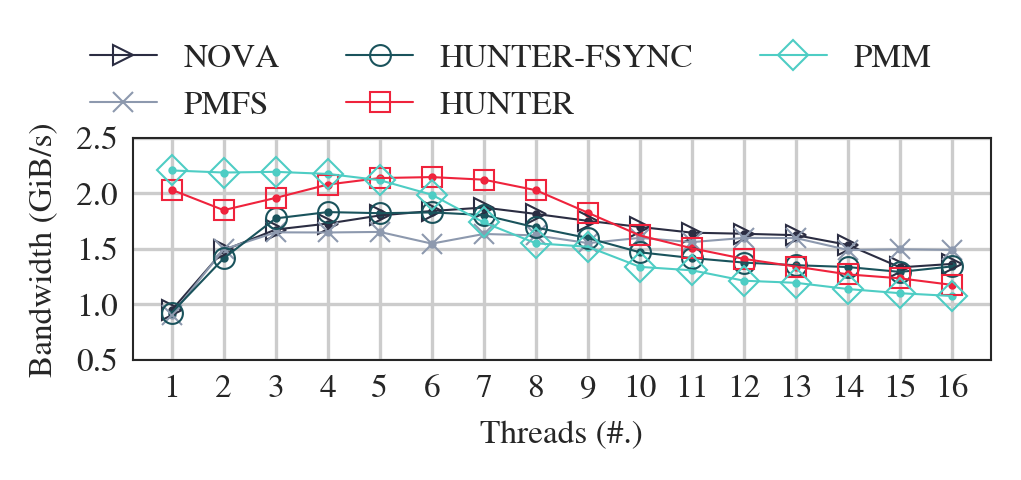

In [2]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.8
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(3.5)))

line_width = 0.5
colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D"]
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
num_jobs = list(range(1, 17))

for idx, fs in enumerate(fss):
    plt.plot(num_jobs, df[df['file_system'] == fs]['bandwidth(MiB/s)'] / 1024, color=colors[idx], markerfacecolor='none', linewidth= line_width,label=fs, marker=marks[idx], markeredgecolor=colors[idx], markersize=5, markeredgewidth=0.5)
    plt.scatter(num_jobs, df[df['file_system'] == fs]['bandwidth(MiB/s)'] / 1024, color=colors[idx], s=1)

# bar_width = 0.2
# subfig_titles = ["(a) Non-interleaved write", "(b) Interleaved write"]
# patterns = ['///', '\\\\\\', 'XXX', '']
# # Reference: https://designbro.com/blog/inspiration/color-combinations/
# colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c"]
# files = ["./performance-comparison-table-single", "./performance-comparison-table-interleaved"]
# x = [1, 2, 3, 4, 5]
# for i in range(2):
#     plt.subplot(1, 2, i + 1)
#     with open(files[i], "r") as f:
#         df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
#     fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
#     tot = len(fss) * bar_width
#     print(fss)
#     for idx, fs in enumerate(fss):
#         points = []
#         for pivot in x:
#             point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
#             points.append(point)
    
#         plt.bar(points, df[df['file_system'] == fs]['bandwidth(MiB/s)'] / 1024, width=bar_width, hatch=patterns[idx], edgecolor='black', color=colors[idx])
#     plt.xticks(x, labels=[1, 2, 4, 8, 16], fontsize=8)
#     if i == 0:
#         plt.yticks([0, 1.5, 3], fontsize=8)
#     if i == 1:

plt.xticks(num_jobs, labels=num_jobs, fontsize=8)
plt.yticks([0.5, 1.0, 1.5, 2.0, 2.5], fontsize=8)
plt.xlabel("Threads (#.)", fontsize=8) 
plt.ylabel('Bandwidth (GiB/s)', fontsize=8)
            
fig.legend(fss, loc='center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=8)
ax = fig.gca()
lw = 0.5
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(lw)
plt.tight_layout()
plt.savefig("./FIG-Multithreads.pdf", bbox_inches='tight', pad_inches=0)
